# Inverter Grid Test

In [58]:
%%bash
TOP=${TOP:-$(git rev-parse --show-toplevel)}
PATH=${TOP}/build/Examples/Cxx

DP_Inverter_Grid_Test

0.000343495


In [1]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read results
logs_dir = '../../../logs_inverter/'
work_dir = 'logs/DP_Inverter_Grid_Test/'
log_name = 'DP_Inverter_Grid_Test'
log_path =  logs_dir + 'DP_Inverter_Grid_Test/' + 'DP_Inverter_Grid_Test.csv'
print(log_path)

ts_dpsim = rt.read_timeseries_dpsim(log_path)

../../../logs_inverter/DP_Inverter_Grid_Test/DP_Inverter_Grid_Test.csv
column number: 23
results length: 50000
real column names: []
complex column names: ['i12_0_0', 'i34_0_0', 'v1_0_0', 'v1_0_1', 'v1_0_2', 'v1_0_3', 'v1_0_4', 'v1_0_5', 'v1_0_6', 'v1_0_7', 'v1_0_8', 'v2_0_0', 'v3_0_0', 'v3_0_1', 'v3_0_2', 'v3_0_3', 'v3_0_4', 'v3_0_5', 'v3_0_6', 'v3_0_7', 'v3_0_8', 'v4_0_0', 'v5_0_0']


In [3]:
ts_list_v1 = [
    ts_dpsim['v1_0_0'],
    ts_dpsim['v1_0_1'],
    ts_dpsim['v1_0_2'],
    ts_dpsim['v1_0_3'],
    ts_dpsim['v1_0_4'],
    ts_dpsim['v1_0_5'],
    ts_dpsim['v1_0_6'],
    ts_dpsim['v1_0_7'],
    ts_dpsim['v1_0_8']]

ts_list_v3 = [
    ts_dpsim['v3_0_0'],
    ts_dpsim['v3_0_1'],
    ts_dpsim['v3_0_2'],
    ts_dpsim['v3_0_3'],
    ts_dpsim['v3_0_4'],
    ts_dpsim['v3_0_5'],
    ts_dpsim['v3_0_6'],
    ts_dpsim['v3_0_7'],
    ts_dpsim['v3_0_8']]

freq_list = [ 50,
    19850, 19950, 20050, 20150,
    39750, 39950, 40050, 40250 ]

(0, 0.05)

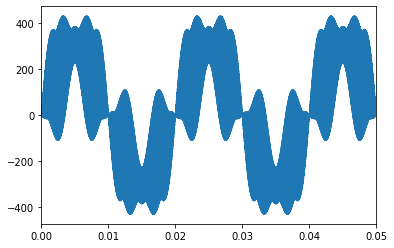

In [4]:
ts_dpsim_emt_v1 = TimeSeries.create_emt_from_dp(ts_list_v1, freq_list)
plt.plot(ts_dpsim_emt_v1.time, ts_dpsim_emt_v1.values)
plt.xlim(0, 0.05)

(0, 0.05)

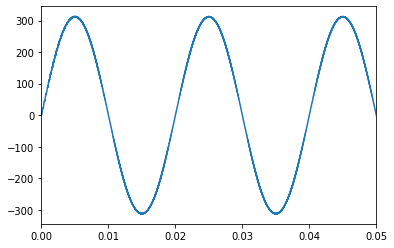

In [5]:
ts_dpsim_emt_v3 = TimeSeries.create_emt_from_dp(ts_list_v3, freq_list)
plt.plot(ts_dpsim_emt_v3.time, ts_dpsim_emt_v3.values)
plt.xlim(0, 0.05)

(0, 0.05)

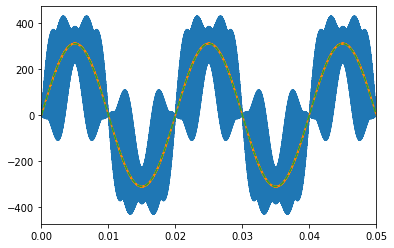

In [6]:
ts_dpsim_emt_v5 = ts_dpsim['v5_0_0'].frequency_shift(50)

plt.plot(ts_dpsim_emt_v1.time, ts_dpsim_emt_v1.values)
plt.plot(ts_dpsim_emt_v3.time, ts_dpsim_emt_v3.values)
plt.plot(ts_dpsim_emt_v5.time, ts_dpsim_emt_v5.values, linestyle='--')
plt.xlim(0, 0.05)

## Validation against Matlab model

The Matlab model is considering 4 harmonics only. Therefore the DPsim results might be slightly different depending on the number of considered harmonics.

In [7]:
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/Inverter/ML_SP_Inverter_OL_v_i.csv'
local_file = 'reference-results/ML_SP_Inverter_OL_v_i.csv'
urllib.request.urlretrieve(url, local_file) 

ts_ml_inverter = rt.read_timeseries_simulink(local_file)

column number: 4
results length: 100001
real column names: ['v_inv', 'v_c', 'i1', 'i2']
complex column names: []


(308, 315)

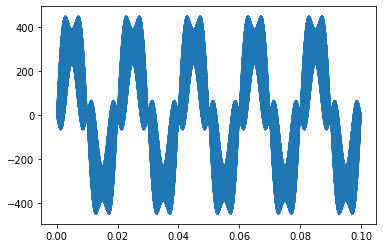

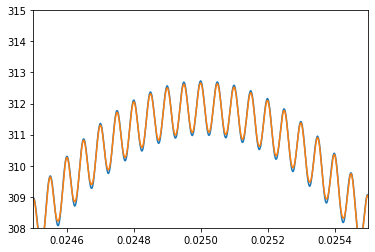

In [8]:
plt.plot(ts_ml_inverter['v_inv'].time, ts_ml_inverter['v_inv'].values)

#plt.figure(figsize=(20,10))
plt.figure()
plt.plot(ts_ml_inverter['v_c'].time, ts_ml_inverter['v_c'].values)
plt.plot(ts_dpsim_emt_v3.time, ts_dpsim_emt_v3.values)
plt.xlim(0.0245, 0.0255)
plt.ylim(308, 315)

In [9]:
import numpy as np
diff = ts_ml_inverter['v_c'].values[:5000] - np.interp(ts_ml_inverter['v_c'].time[:5000], ts_dpsim_emt_v3.time, ts_dpsim_emt_v3.values)
assert np.all(diff) < 10

## Validation against Simulink switching model

In [10]:
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://git.rwth-aachen.de/acs/public/simulation/reference-results/raw/master/Simulink/Inverter/SL_SP_Inverter_OL_v_i.csv'
local_file = 'reference-results/SL_SP_Inverter_OL_v_i.csv'
urllib.request.urlretrieve(url, local_file) 

ts_sl_inverter = rt.read_timeseries_simulink(local_file)

column number: 4
results length: 712639
real column names: ['v_inv', 'v_c', 'i1', 'i2']
complex column names: []


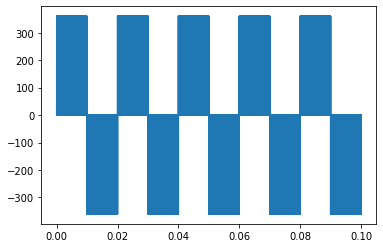

In [11]:
plt.plot(ts_sl_inverter['v_inv'].time, ts_sl_inverter['v_inv'].values)

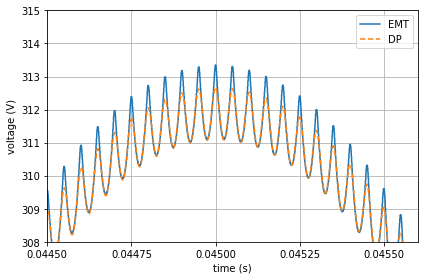

In [23]:
plt.plot(ts_sl_inverter['v_c'].time, ts_sl_inverter['v_c'].values, label='EMT')
plt.plot(ts_dpsim_emt_v3.time, ts_dpsim_emt_v3.values, label='DP', linestyle='--')

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.xlim(0.0445,0.0456)
plt.ylim(308,315)
plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.grid()
plt.legend(loc='upper right')
#ax = plt.gca()
#ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.tight_layout()
plt.savefig('dp_simulink_inv_8_harm.pdf')
plt.savefig('dp_simulink_inv_8_harm.png', dpi=300)

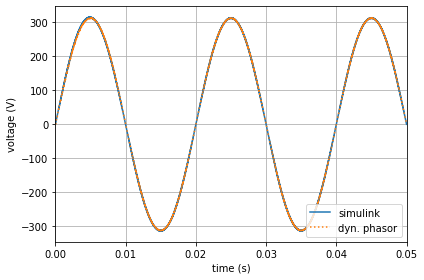

In [24]:
plt.plot(ts_sl_inverter['v_c'].time, ts_sl_inverter['v_c'].values, label='simulink')
plt.plot(ts_dpsim_emt_v3.time, ts_dpsim_emt_v3.values, linestyle=":", label='dyn. phasor')
plt.xlim(0, 0.05)

plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()

plt.savefig('dp_simulink_inv_8_harm_complete.pdf')
plt.savefig('dp_simulink_inv_8_harm_complete.png', dpi=300)